In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import Ga

In [ ]:
def lerarquivo(mes):
     #Caminho do arquivo CSV
    url = f"../dados-tratados/pc-{mes:0>2}.csv"

    # Carregando o dataset
    return pd.read_csv(url, sep=";")

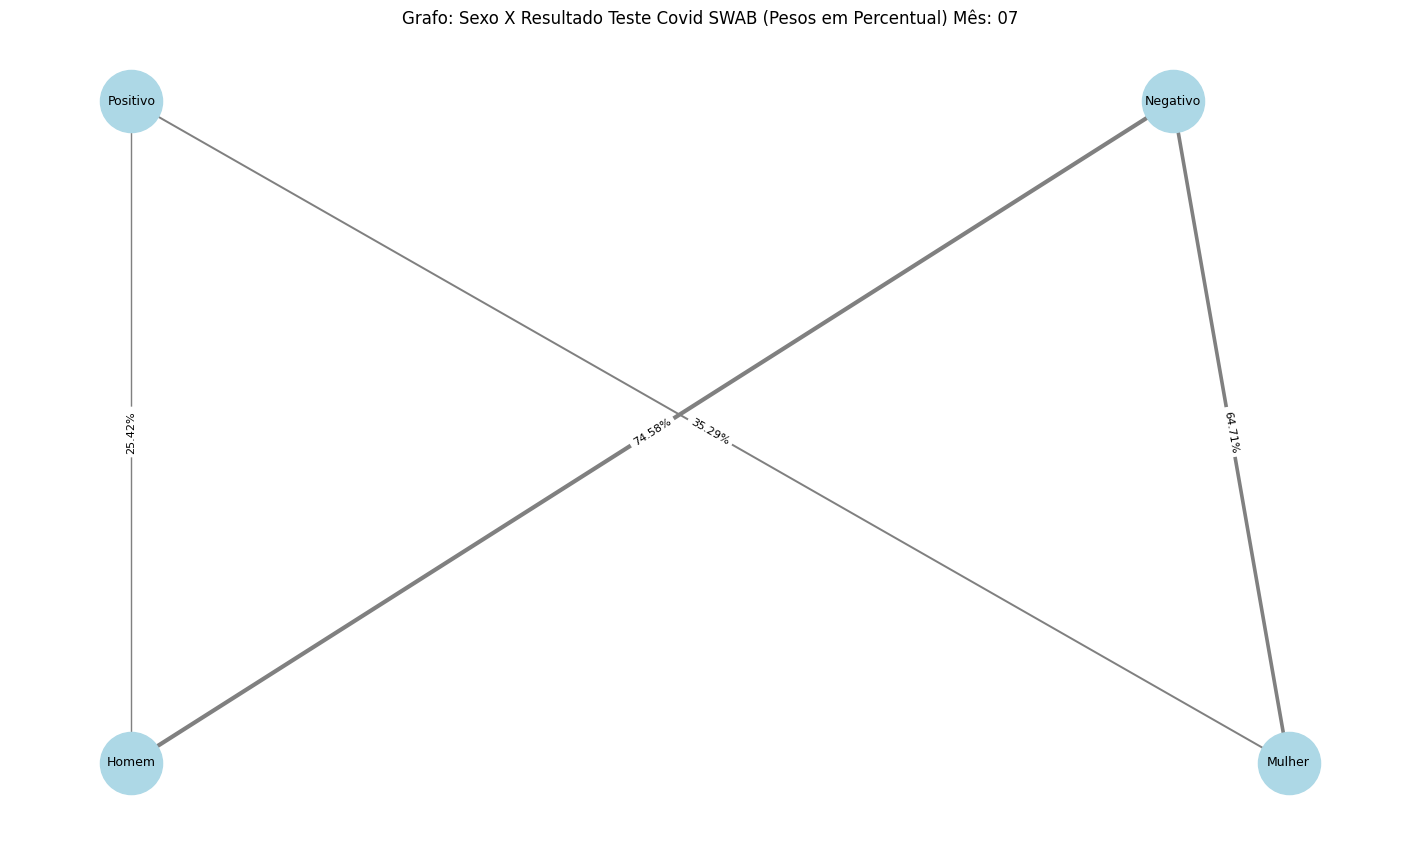

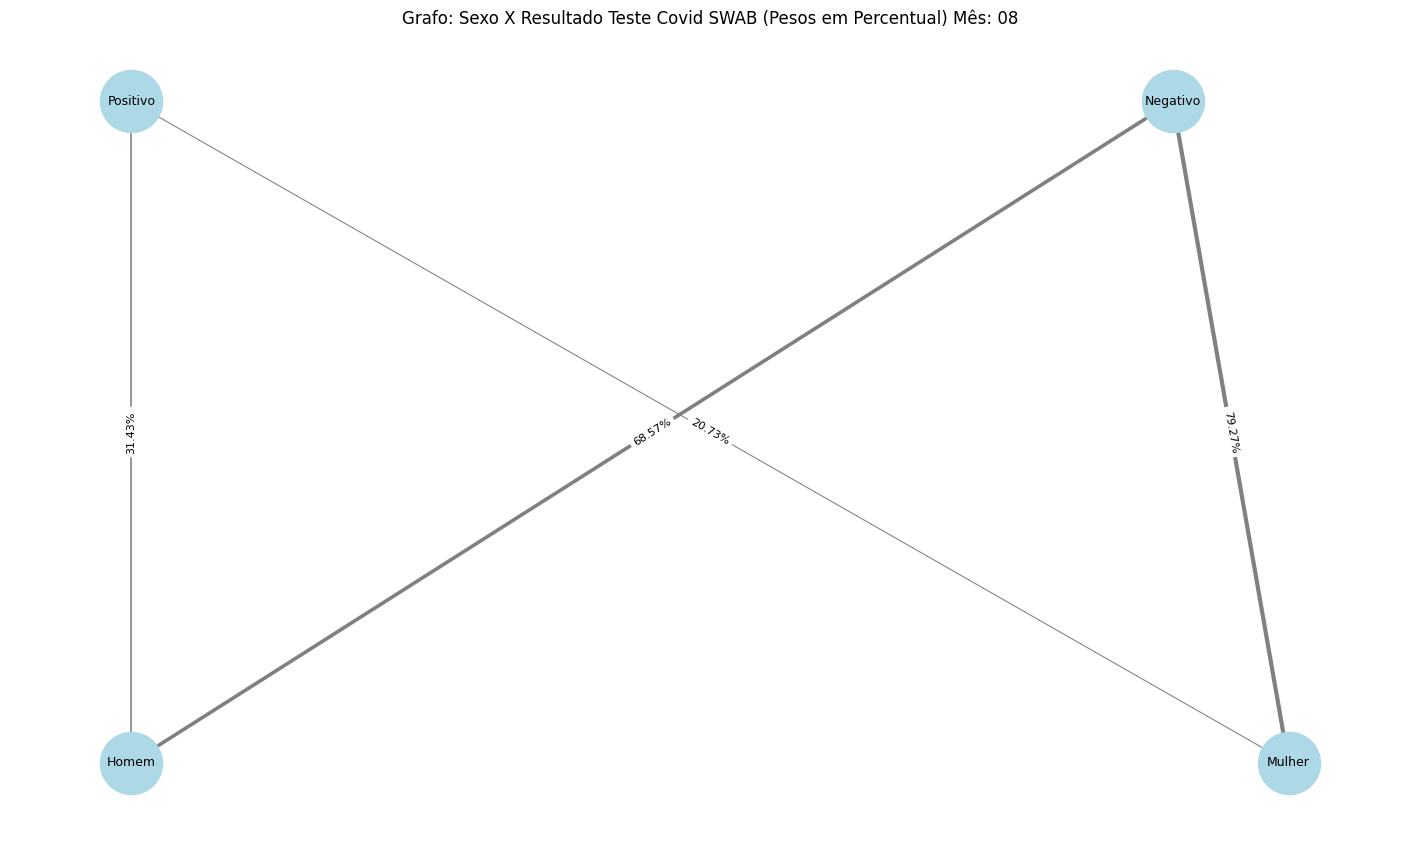

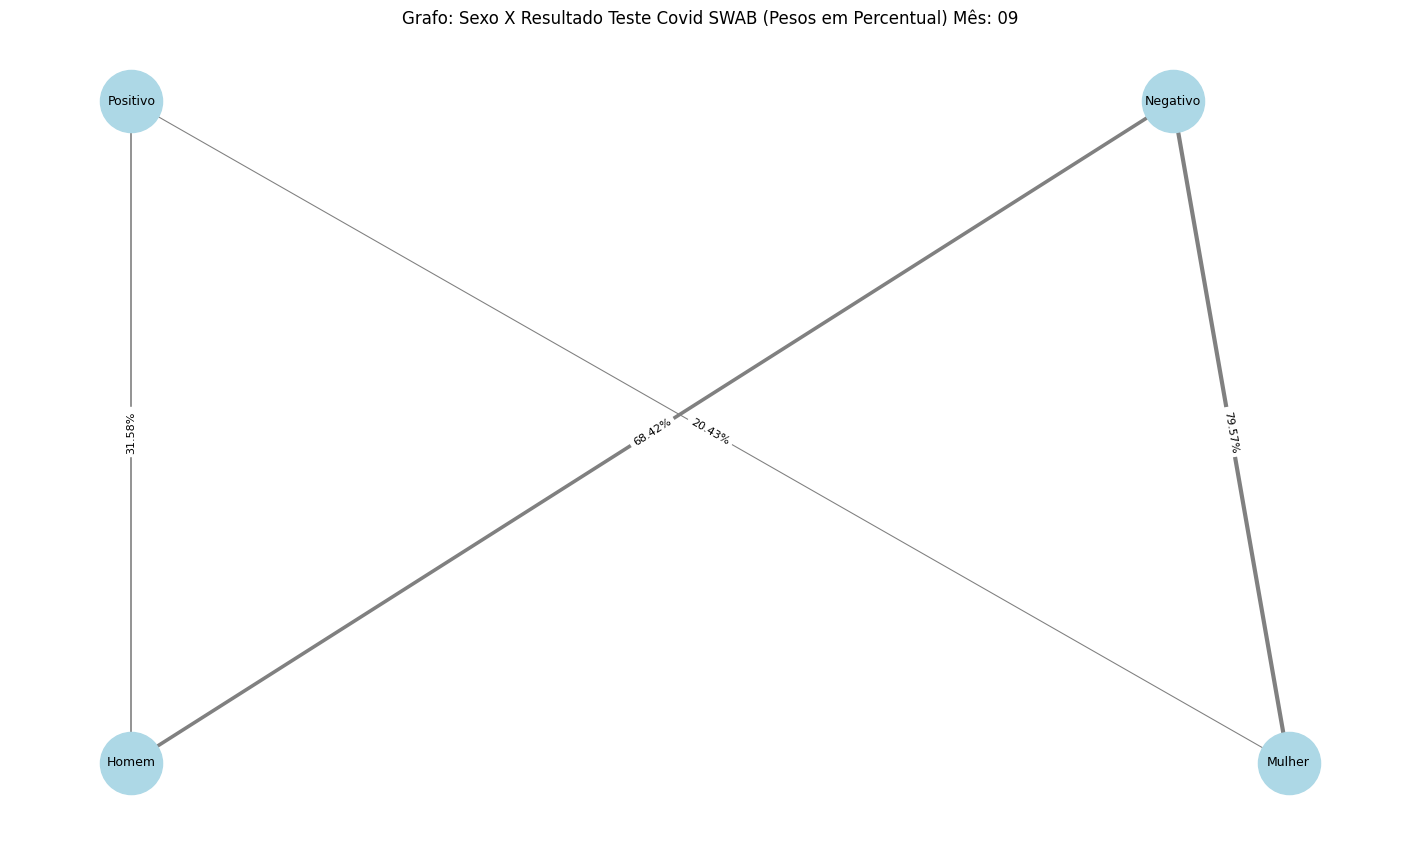

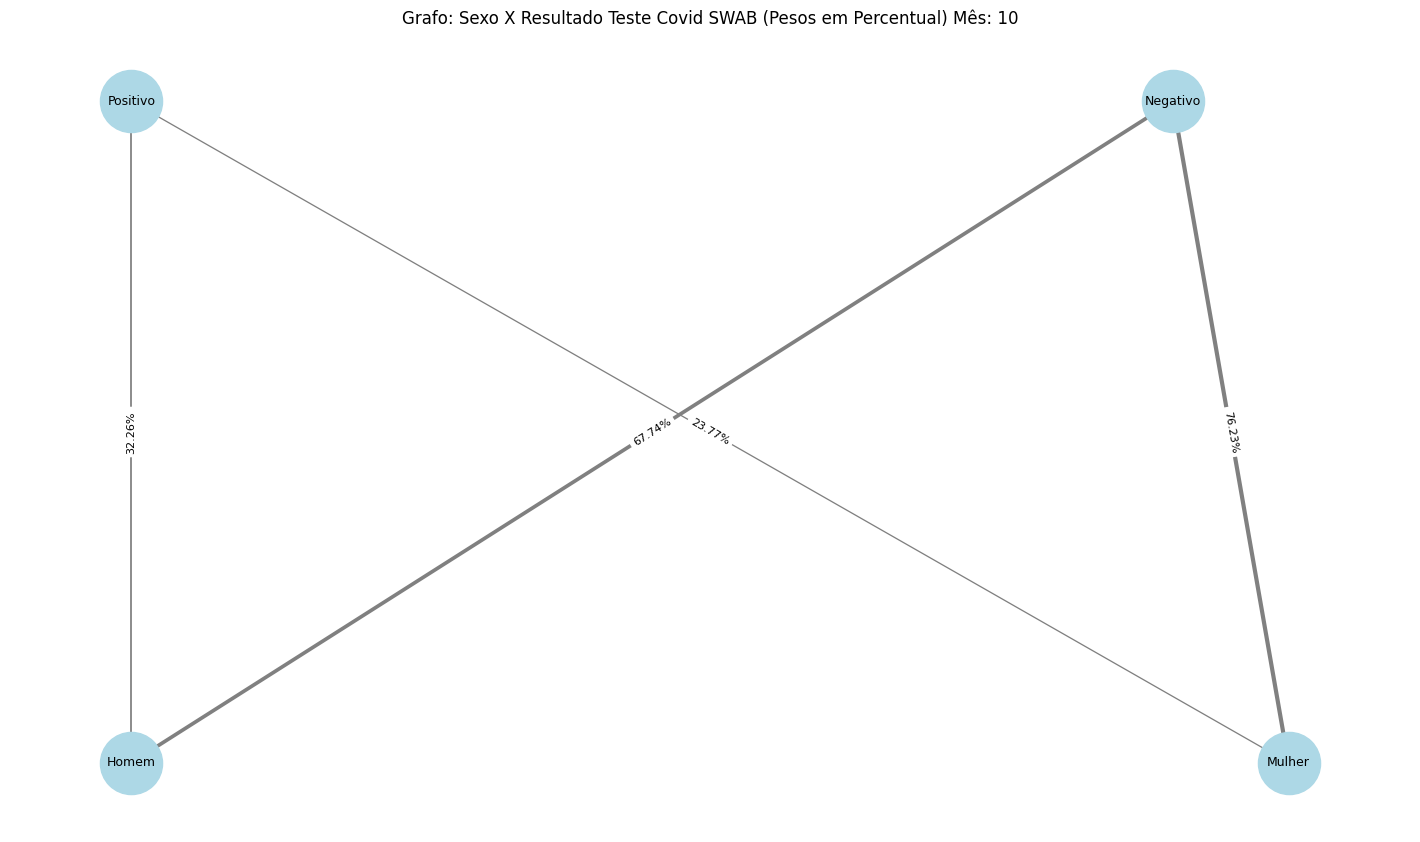

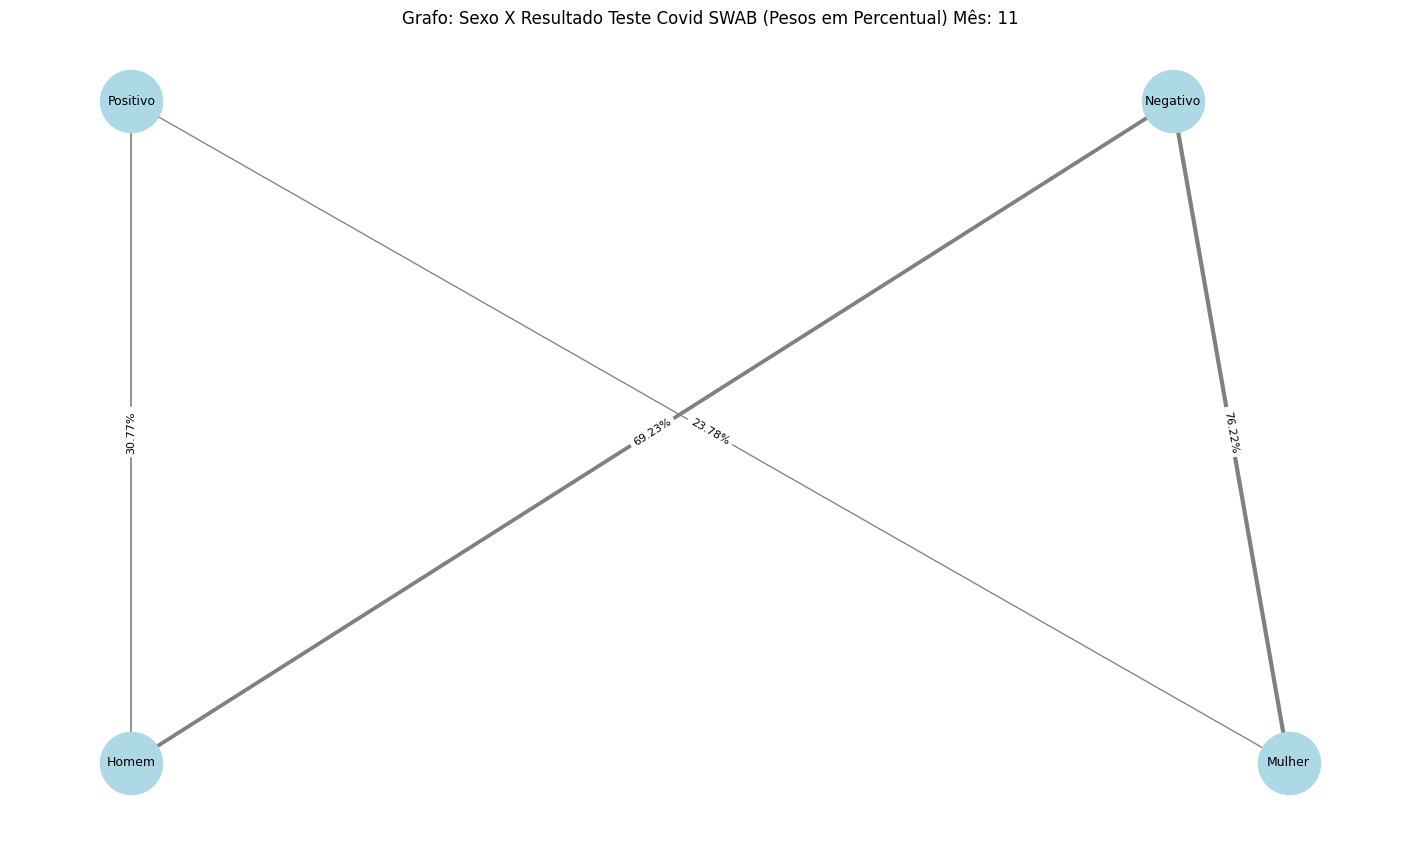

In [ ]:
# Definindo os sexos e os resultados de teste
sexos = [
    "Homem", "Mulher"
]
resultado_teste = [
    "Positivo", "Negativo"
]

# Loop para os meses (ajuste conforme necessário)
for m in range(7, 12):
    df = lerarquivo(m)

    # Preenchendo NaN nas colunas de Sexo e Resultado_teste e filtrando
    sexo_coluna = "Sexo"
    resultado_coluna = "Resultado_SWAB"
    df = df[df[sexo_coluna].isin(sexos)]  # Filtrando os sexos
    df = df[df[resultado_coluna].isin(resultado_teste)]  # Filtrando os valores válidos para Resultado_teste

    # Variáveis para contar "Inconclusivo" e "Ignorado"
    contagem_inconclusivo_homens = 0
    contagem_ignorado_homens = 0
    contagem_inconclusivo_mulheres = 0
    contagem_ignorado_mulheres = 0

    # Calculando as arestas entre sexo e resultado do teste
    pesos = {}

    for _, row in df.iterrows():
        sexo = row[sexo_coluna]
        resultado = row[resultado_coluna]
        peso = 1  # A cada valor de Resultado_teste, adiciona 1

        # Contagem de "Inconclusivo" e "Ignorado"
        if resultado == "Inconclusivo":
            if sexo == "Homem":
                contagem_inconclusivo_homens += 1
            elif sexo == "Mulher":
                contagem_inconclusivo_mulheres += 1
        elif resultado == "Ignorado":
            if sexo == "Homem":
                contagem_ignorado_homens += 1
            elif sexo == "Mulher":
                contagem_ignorado_mulheres += 1

        # Se a aresta já existe, soma o peso
        if (sexo, resultado) in pesos:
            pesos[(sexo, resultado)] += peso
        else:
            pesos[(sexo, resultado)] = peso

    # Restante do código para criar e plotar o grafo
    G = nx.Graph()
    G.add_nodes_from(sexos, bipartite=0)  # Sexo na parte superior
    G.add_nodes_from(resultado_teste, bipartite=1)  # Resultado do teste na parte inferior

    # Contagem de pessoas por sexo
    total_por_sexo = df[sexo_coluna].value_counts().to_dict()

    # Calculando as arestas entre sexo e resultado do teste
    pesos = {}

    for _, row in df.iterrows():
        sexo = row[sexo_coluna]
        resultado = row[resultado_coluna]
        peso = 1  # A cada valor de Resultado_teste, adiciona 1

        # Se a aresta já existe, soma o peso
        if (sexo, resultado) in pesos:
            pesos[(sexo, resultado)] += peso
        else:
            pesos[(sexo, resultado)] = peso

    # Calculando os pesos percentuais das arestas em relação à quantidade de pessoas no sexo
    pesos_percentuais = {}

    # Cálculo dos totais de homens e mulheres para a porcentagem
    total_homens = total_por_sexo.get("Homem", 0)
    total_mulheres = total_por_sexo.get("Mulher", 0)

    # Ajustando os pesos percentuais por sexo
    for (sexo, resultado), peso in pesos.items():
        if sexo == "Homem":
            porcentagem = (peso / total_homens) * 100 if total_homens > 0 else 0
        elif sexo == "Mulher":
            porcentagem = (peso / total_mulheres) * 100 if total_mulheres > 0 else 0
        else:
            porcentagem = 0

        pesos_percentuais[(sexo, resultado)] = porcentagem

    # Adicionando as arestas ao grafo com os pesos em percentual
    for (u, v), peso in pesos_percentuais.items():
        G.add_edge(u, v, weight=peso)

    # Definindo a posição dos nós (sexos na parte superior, resultado teste na parte inferior)
    pos = {}

    # Posicionando os sexos na parte superior com espaçamento uniforme
    sexo_x = np.linspace(2, 7, len(sexos))  # Espaçamento uniforme ao longo do eixo X
    for i, (sexo, x) in enumerate(zip(sexos, sexo_x)):
        pos[sexo] = (x, 0)  # Sexos na parte superior

    # Posicionando os resultados de teste na parte inferior com espaçamento uniforme
    resultado_x = np.linspace(2,6.5, len(resultado_teste))  # Espaçamento uniforme
    for i, (resultado, x) in enumerate(zip(resultado_teste, resultado_x)):
        pos[resultado] = (x, 1)  # Resultados de teste na parte inferior

    # Extrair os pesos das arestas para ajustar a espessura
    edges = G.edges(data=True)
    max_peso = max(pesos_percentuais.values()) if pesos_percentuais else 1  # Evitar divisão por zero
    weights = [edata["weight"] / max_peso * 3 for _, _, edata in edges]  # Ajuste de espessura

    # Rótulos nas arestas com as porcentagens
    edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}

    # Plotando o grafo
    plt.figure(figsize=(14, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"Grafo: Sexo X Resultado Teste Covid SWAB (Pesos em Percentual) Mês: {m:02}")
    plt.show()
    cont = 0
    if "Inconclusivo" in resultado:
        cont = cont+1
        print(cont)


In [ ]:
# Definindo os sexos e teste de coronavírus
sexos = [
    "Homem", "Mulher"
]
teste_coronavirus = [
    "Sim", "Nao", "Ignorado"
]

# Função para carregar os arquivos
def lerarquivo(m):
    # Implemente a leitura do arquivo aqui (aqui como exemplo um DataFrame fictício)
    return pd.read_csv(f"dataset_{m}.csv")  # Exemplo de leitura com CSV

# Loop para os meses (ajuste conforme necessário)
for m in range(5, 12):
    df = lerarquivo(m)

    # Preenchendo NaN na coluna de Sexo e Teste_coronavirus e filtrando as colunas
    sexo_coluna = "Sexo"
    teste_coluna = "Teste_coronavirus"
    df[sexo_coluna] = df[sexo_coluna].fillna("Ignorado")  # Evitar erro com NaN
    df[teste_coluna] = df[teste_coluna].fillna("Ignorado")  # Evitar erro com NaN
    df = df[df[sexo_coluna].isin(sexos)]  # Filtrando os sexos
    df = df[df[teste_coluna].isin(teste_coronavirus)]  # Filtrando os testes

    # Criando o grafo
    G = nx.Graph()

    # Adicionando os nós de sexo à parte superior e teste ao fundo
    G.add_nodes_from(sexos, bipartite=0)  # Sexo na parte superior
    G.add_nodes_from(teste_coronavirus, bipartite=1)  # Teste_coronavirus na parte inferior

    # Contagem de pessoas por sexo
    total_por_sexo = df[sexo_coluna].value_counts().to_dict()

    # Calculando as arestas entre sexo e teste
    pesos = {}

    for _, row in df.iterrows():
        sexo = row[sexo_coluna]
        teste = row[teste_coluna]
        if teste in teste_coronavirus:  # Considerando os valores "Sim", "Nao" e "Ignorado"
            peso = 1  # A cada presença do teste, adiciona 1

            # Se a aresta já existe, soma o peso
            if (sexo, teste) in pesos:
                pesos[(sexo, teste)] += peso
            else:
                pesos[(sexo, teste)] = peso

    # Calculando os pesos percentuais das arestas em relação à quantidade de pessoas no sexo
    pesos_percentuais = {
        (u, v): (peso / total_por_sexo[u]) * 100 for (u, v), peso in pesos.items()
    }

    # Adicionando as arestas ao grafo com os pesos em percentual
    for (u, v), peso in pesos_percentuais.items():
        G.add_edge(u, v, weight=peso)

    # Definindo a posição dos nós (sexos na parte superior, teste na parte inferior)
    pos = {}

    # Posicionando os sexos na parte superior com espaçamento uniforme
    sexo_x = np.linspace(0.5, 1.5, len(sexos))  # Posicionamento mais centralizado na parte superior
    for i, (sexo, x) in enumerate(zip(sexos, sexo_x)):
        pos[sexo] = (x, 1)  # Sexos na parte superior

    # Posicionando os testes na parte inferior com espaçamento uniforme
    teste_x = np.linspace(0, len(teste_coronavirus) - 1, len(teste_coronavirus))  # Espaçamento uniforme ao longo do eixo X
    for i, (teste, x) in enumerate(zip(teste_coronavirus, teste_x)):
        pos[teste] = (x, 0)  # Testes na parte inferior

    # Extrair os pesos das arestas para ajustar a espessura
    edges = G.edges(data=True)
    max_peso = max(pesos_percentuais.values()) if pesos_percentuais else 1  # Evitar divisão por zero
    weights = [edata["weight"] / max_peso * 3 for _, _, edata in edges]  # Ajuste de espessura

    # Rótulos nas arestas com as porcentagens
    edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}

    # Plotando o grafo
    plt.figure(figsize=(14, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"Grafo: Sexo X Teste de Coronavírus (Pesos em Percentual) Mês: {m:02}")
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'dataset_5.csv'